# load dict & material sentences with certain topic

In [1]:
import json

with open('final_pairs.json', 'r', encoding='utf-8') as f:
    pairs = json.load(f)  
full_abb = {}
for abb in pairs.keys():
    for full in pairs[abb].keys():
        if full not in full_abb:
            full_abb[full] = abb

In [2]:
ELEMENTS = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K',
                'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr',
                'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I',
                'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
                'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr',
                'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf',
                'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og', 'Uue', 'SiO2']

ELEMENT_NAMES = ['hydrogen', 'helium', 'lithium', 'beryllium', 'boron', 'carbon', 'nitrogen', 'oxygen', 'fluorine',
                     'neon', 'sodium', 'magnesium', 'aluminium', 'silicon', 'phosphorus', 'sulfur', 'chlorine', 'argon',
                     'potassium', 'calcium', 'scandium', 'titanium', 'vanadium', 'chromium', 'manganese', 'iron',
                     'cobalt', 'nickel', 'copper', 'zinc', 'gallium', 'germanium', 'arsenic', 'selenium', 'bromine',
                     'krypton', 'rubidium', 'strontium', 'yttrium', 'zirconium', 'niobium', 'molybdenum', 'technetium',
                     'ruthenium', 'rhodium', 'palladium', 'silver', 'cadmium', 'indium', 'tin', 'antimony', 'tellurium',
                     'iodine', 'xenon', 'cesium', 'barium', 'lanthanum', 'cerium', 'praseodymium', 'neodymium',
                     'promethium', 'samarium', 'europium', 'gadolinium', 'terbium', 'dysprosium', 'holmium', 'erbium',
                     'thulium', 'ytterbium', 'lutetium', 'hafnium', 'tantalum', 'tungsten', 'rhenium', 'osmium',
                     'iridium', 'platinum', 'gold', 'mercury', 'thallium', 'lead', 'bismuth', 'polonium', 'astatine',
                     'radon', 'francium', 'radium', 'actinium', 'thorium', 'protactinium', 'uranium', 'neptunium',
                     'plutonium', 'americium', 'curium', 'berkelium', 'californium', 'einsteinium', 'fermium',
                     'mendelevium', 'nobelium', 'lawrencium', 'rutherfordium', 'dubnium', 'seaborgium', 'bohrium',
                     'hassium', 'meitnerium', 'darmstadtium', 'roentgenium', 'copernicium', 'nihonium', 'flerovium',
                     'moscovium', 'livermorium', 'tennessine', 'oganesson', 'ununennium', 'silica']
for i, e in enumerate(ELEMENTS):
    full_abb[ELEMENT_NAMES[i]] = e
    larger = ELEMENT_NAMES[i][0].upper()+ELEMENT_NAMES[i][1:]
    full_abb[larger] = e

In [3]:
def return_m(full_abb, m):
    if m in full_abb.keys():
        return full_abb[m]
    else:
        return m

In [4]:
def reserve_material(dir_name):
    check_dir = 'manual check/'+dir_name+'_checked.txt'
    new = []
    with open(check_dir, 'r', encoding='utf-8') as f:
        new_data = f.readlines()
        for d in new_data:
            name = d.split('\t')[1]            
            new.append(name)
            if name[0].isupper():
                new.append(name[0].lower()+name[1:])
            else:
                new.append(name[0].upper()+name[1:])
    return new

In [49]:
# Hydrophilic_Elsevier_8921
# Hydrophobic_Elsevier_13677
# Oleophobic_Elsevier_581
# Omniphobic_Elsevier_143
# Photocatalytic_Elsevier_13437
# SC_Elesever_2044
import os
import json
from tqdm import tqdm

dir_name = 'Photocatalytic_Elsevier_13437'
with open('material_names/'+dir_name+'/sen_dict.json', 'r', encoding='utf-8') as f:
    sen_dict = json.load(f)
    
with open('material_names/'+dir_name+'/com_dict.json', 'r', encoding='utf-8') as f:
    com_dict = json.load(f)

# Property recognition

In [6]:
# contact angle / sliding angle ----- [0-9.]+[±]*[0-9.]*°
# transmittance ------ [0-9.]+[±|–]*[0-9.]*%
# refractive index ----- [0-9]{1}[.]{1}[0-9]+

In [6]:
def judge(rule, sen):
    pos = re.finditer(rule, sen)
    no_front = ['increase of', 'increases of', 'increasing of', 'decrease of', 'decreases of']
    no_later = ['higher than', 'lower than']
    no_by = ['improve','reduce','larger','increase','decrease','lower', 'increasing', 'decreasing', 'improving', 'reducing']
    true_pos = []
    for p in pos:
        flag = True
        start = p.span()[0]
        end = p.span()[1]
        fw = sen[max(0, start-30):start]
        lw = sen[end:min(len(sen), end+20)]
        for nf in no_front:
            if nf in fw:
                flag = False
        for nl in no_later:
            if nl in lw:
                flag = False
        for nb in no_by:
            if nb in sen[:start] and ' by ' in fw:
                flag = False
        if 'difference' in sen[:start] or 'error' in sen[:start]:
            flag = False
        if flag:
            true_pos.append(p)
    return true_pos

In [7]:
def str2float(value, rep):
    if '±' in value:
        try:
            final = float(value.split('±')[0])
        except:
            return None
    elif '–' in value:
        try:
            final = float(value.split('–')[0])
        except:
            return None
    else:
        try:
            final = float(value.replace(rep, ''))
        except:
            return None
    return final

In [8]:
def update_dic(mat_degree, mat, degree, s, sen_dict):
    if mat not in mat_degree.keys():
        mat_degree[mat] = {}
        mat_degree[mat][degree] = [[s, sen_dict[s]['doi']]]
    else:
        if degree not in mat_degree[mat].keys():
            mat_degree[mat][degree] = [[s, sen_dict[s]['doi']]]
        else:
            mat_degree[mat][degree].append([s, sen_dict[s]['doi']])
    return mat_degree

In [20]:
def filter_(range1, range2, remove, angle, mat_degree):
    new = {}
    new_mat_degree = {}
    tmp_list = []
    # print(angle.keys())
    for t in angle.keys():
        # print(t)
        ft = float(t)
        if ft>range1 and ft<range2 and ft not in remove:
            new[t] = angle[t]
            for i in range(angle[t]):
                tmp_list.append(float(t))
    for m in mat_degree.keys():
        need_t = []
        for t in mat_degree[m].keys():
            ft = float(t)
            if ft>range1 and ft<range2 and ft not in remove:
                need_t.append(t)
        if need_t !=[]:
            new_mat_degree[m] = {}
            for nt in need_t:
                new_mat_degree[m][nt] = mat_degree[m][nt]
    return new, new_mat_degree, tmp_list

In [10]:
def clean_candidates(sen, candidates):
    can_copy = candidates.copy()
    for_remove = []
    span = ['-', '/', ' ', '@', '–']
    for c1 in candidates:
        for c2 in candidates:
            for sp in span:
                if c1+sp+c2 in sen: 
                    candidates.append(c1+sp+c2)
                    for_remove.append(c1)
                    for_remove.append(c2)
    for r in list(set(for_remove)):
        candidates.remove(r)
    return candidates

In [11]:
def is_appendix(sen, candidates, values):
    tmp = {}
    for c in candidates:
        if c+' (' in sen:
            start = sen.find(c+' (')
            end = start + sen[start:].find(')')
            # print(sen[start:end+1], end-start-len(c))
            for v in values:
                if (str(v)+' ' in sen[start:end+1] or str(v)+')' in sen[start:end+1]) and end-start-len(c)<30:
                    tmp[v] = c
    return tmp

In [12]:
def only_pair(sp, candidates, values):
    tmpc = []
    tmpv = []
    for c in candidates:
        if c in sp:
            tmpc.append(c)
    for v in values:
        if str(v) in sp:
            tmpv.append(v)
    if len(tmpc) == 1 and len(tmpv)>= 1:
        return tmpc[0], tmpv[0]
    else:
        return None

In [13]:
def is_for(sen, candidates, values):
    # v for c
    tmp = {}
    pos_v = {}
    for v in values:
        pos_v[v] = sen.find(str(v)+' ')
    values.sort()
    pre = ['refractive index of ', 'refractive index for ']
    app = ['was', 'is']
    for c in candidates:
        if 'for '+c in sen:
            for_p = sen.find('for '+c)
            for v in values:
                if str(v)+' ' in sen[for_p-10:for_p]:
                    tmp[v] = c
        for p in pre:
            for a in app:
                if p+c in sen:
                    start = sen.find(p+c)+len(p+c)
                    if a in sen[start:start+10]:
                        for v in values:
                            if pos_v[v] > start:
                                tmp[v] = c
                                break
    return tmp

In [14]:
def is_split(sen, candidates, values):
    sen_sp = sen.split(',')
    tmp = {}
    for sp in sen_sp:
        pair = only_pair(sp, candidates, values)
        if pair:
            tmp[pair[1]] = pair[0]
    if ' and ' in sen: # and 可以分割开
        and_p = [substr.start() for substr in re.finditer(' and ', sen)]
        for ap in and_p:
            pair = only_pair(sen[:ap], candidates, values)
            if pair:
                tmp[pair[1]] = pair[0]
            pair = only_pair(sen[ap:], candidates, values)
            if pair:
                tmp[pair[1]] = pair[0]
        if len(candidates)==2 and len(values) == 2 and len(and_p)==2:
            tmp_c = {}
            for c in candidates:
                tmp_c[sen.find(c)] = c
            tmp_v = {}
            for v in values:
                tmp_v[sen.find(str(v))] = v
            p0 = sen.find(candidates[0])
            p1 = sen.find(candidates[1])
            v0 = sen.find(str(values[0]))
            v1 = sen.find(str(values[1]))
            if (p0<and_p[0]<p1 or p1<and_p[0]<p0) and (v0<and_p[1]<v1 or v1<and_p[1]<v0):
                if v0<v1:
                    if p0 < p1:
                        tmp[tmp_v[v0]] = tmp_c[p0]
                        tmp[tmp_v[v1]] = tmp_c[p1]
                    else:
                        tmp[tmp_v[v0]] = tmp_c[p1]
                        tmp[tmp_v[v1]] = tmp_c[p0]
                else:
                    if p0 < p1:
                        tmp[tmp_v[v0]] = tmp_c[p1]
                        tmp[tmp_v[v1]] = tmp_c[p0]
                    else:
                        tmp[tmp_v[v0]] = tmp_c[p0]
                        tmp[tmp_v[v0]] = tmp_c[p1]
                        
        
    return tmp

In [15]:
def value_3(sen, candidates, valid_pos):
    # v, v and v for c, c and c
    # c, c and c were/are v, v and v
    tmp = {}
    v_p = {}
    c_p = {}
    for v in valid_pos:
        v_p[v.span()[0]] = sen[v.span()[0]:v.span()[1]]
    for c in candidates:
        c_p[sen.find(c)] = c
    vps = list(v_p.keys()).copy()
    vps.sort()
    cps = list(c_p.keys()).copy()
    cps.sort()
    if 'and' in sen[vps[1]:vps[2]] and 'for' in sen[vps[2]:] and vps[2]<cps[0]:
        comma = sen[vps[2]:].find(',')+vps[2]
        and_p = sen[comma:].find(' and ') + comma
        for c in cps:
            if c > vps[2] and c<comma:
                tmp[c_p[c]] = v_p[vps[0]]
            if c > comma and c< and_p:
                tmp[c_p[c]] = v_p[vps[1]]
            if c > and_p:
                tmp[c_p[c]] = v_p[vps[2]]
    if ('were' in sen[cps[-1]:vps[0]] or 'are' in sen[cps[-1]:vps[0]]) and 'and' in sen[vps[1]:vps[2]] and vps[0]>cps[-1]:
        and_p = sen[:vps[0]].rfind('and')
        comma = sen[:and_p].rfind(',')
        for c in cps:
            if c<comma:
                tmp[c_p[c]] = v_p[vps[0]]
            if c>comma and c<and_p:
                tmp[c_p[c]] = v_p[vps[1]]
            if c>and_p and c<vps[0]:
                tmp[c_p[c]] = v_p[vps[2]]
    return tmp

# 4. refractive index ------- [0-9]{1}[.]{1}[0-9]+

In [238]:
# 如果有多个value，只有一个mat，判定后直接记录都是这个mat的
# 如果有多个value，多个mat，进入启发
# 如果一个value一个mat，判定后直接记录

In [140]:
import re
import stanza

index = {}
mat_index = {}
reserve = reserve_material(dir_name)
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,depparse')
for s in tqdm(sen_dict.keys()):
    if 'refractive index' in s:
        re_i = s.index('refractive index')
        pos = judge('[0-9]{1}[.]{1}[0-9]+', s[re_i:])        
        idx_mat = {}
        candidates = []
        values = []
        valid_p = []
        for mat in sen_dict[s]['materials'].keys():
            material = return_m(full_abb, mat)
            if material in reserve:
                candidates.append(mat)
        candidates = clean_candidates(s, candidates)
        for i, p in enumerate(pos):
            if s[re_i:][p.span()[0]-1] in ['=', ' ', '–', '∼', '~', '(', '±', '>', '≈', '–', '<']:
                degree = str2float(s[re_i:][p.span()[0]:p.span()[1]], '#')
                if degree>1 and degree < 5:
                    values.append(degree)
                    valid_p.append(p)
        if len(values)>0:
            if len(candidates)==1:
                if len(valid_p)>1:
                    print(s)
                    print(candidates, values)
                    idx_mat = is_appendix(s, candidates, values)
                    if idx_mat == {}:
                        dis_list = {}
                        for i, p in enumerate(valid_p):
                            dis_list[values[i]] = {}
                            dis_list[values[i]]['dis'] = abs(s.find(candidates[0])-(re_i+p.start()))
                            dis_list[values[i]]['pos'] = re_i+p.start()
                        sorted_dis = sorted(dis_list.items(), key=lambda item:item[1]['dis'])
                        print(sorted_dis)
                        idx_mat[sorted_dis[0][0]] = candidates[0]                    
                        for sd in sorted_dis[1:]:
                            if abs(sd[1]['pos']-sorted_dis[0][1]['pos'])<20:
                                idx_mat[sd[0]] = candidates[0]
                        print(idx_mat)
                else:
                    idx_mat[values[0]] = candidates[0]
            elif len(candidates)>1:
                idx_mat = is_appendix(s, candidates, values)
                if idx_mat =={}:
                    idx_mat = is_for(s, candidates, values)
                    if idx_mat == {}:
                        idx_mat = is_split(s, candidates, values)
                        if idx_mat == {}:
                            idx_mat = match(nlp, s, values, candidates)

        for idx in idx_mat.keys():
            mat = return_m(full_abb,idx_mat[idx])
            if idx not in index.keys():
                index[idx] = 1
            else:
                index[idx] += 1
            mat_index = update_dic(mat_index, mat, idx, s, sen_dict)


2023-08-09 02:09:22 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-08-09 02:09:23 WARNING: Can not find mwt: default from official model list. Ignoring it.
2023-08-09 02:09:23 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2023-08-09 02:09:23 INFO: Use device: gpu
2023-08-09 02:09:23 INFO: Loading: tokenize
2023-08-09 02:09:23 INFO: Loading: pos
2023-08-09 02:09:24 INFO: Loading: lemma
2023-08-09 02:09:24 INFO: Loading: depparse
2023-08-09 02:09:24 INFO: Done loading processors!
 37%|███▋      | 60673/163769 [00:00<00:00, 377721.25it/s]

The refractive index of hybrid coatings can be precisely and conveniently tuned at a range from 1.19 to 1.45 by controlled incorporation of TiO2 into these nanopores.
['TiO2'] [1.19, 1.45]
[(1.45, {'dis': 36, 'pos': 104}), (1.19, {'dis': 44, 'pos': 96})]
{1.45: 'TiO2', 1.19: 'TiO2'}
In this work, the SiO2 coating has a porosity of about 50%, and the refractive index can be precisely tuned in a range from 1.19 to 1.45, by changing the number of SSP cycles, hence the filling ratio.
['SiO2'] [1.19, 1.45]
[(1.19, {'dis': 106, 'pos': 124}), (1.45, {'dis': 114, 'pos': 132})]
{1.19: 'SiO2', 1.45: 'SiO2'}
The incorporation of TiO2 can tune the refractive index in a wide range of 1.19–1.45.
['TiO2'] [1.19, 1.45]
[(1.19, {'dis': 54, 'pos': 75}), (1.45, {'dis': 59, 'pos': 80})]
{1.19: 'TiO2', 1.45: 'TiO2'}
The refractive index of WO3 is 2.014, beyond the desired threshold value of 2.0 while its extinction coefficient reaches a minimum value of 0.012.
['WO3'] [2.014, 2.0]
[(2.014, {'dis': 7, 'pos'

[24] Additionally, Fig. 7 presents a clear and significant increase of refractive index from 1.3 to 3.3 by an increase of aluminum atoms in visible range.
['aluminum'] [1.3, 3.3]
[(3.3, {'dis': 22, 'pos': 100}), (1.3, {'dis': 29, 'pos': 93})]
{3.3: 'aluminum', 1.3: 'aluminum'}


 67%|██████▋   | 110351/163769 [00:00<00:00, 233152.52it/s]

Noack et al. prepared MgF2 films on glass substrate with dip-coating method, of which refractive index of the film was between 1.21 and 1.20 in the wavelength range of 300–1200 nm, the reflectance of coated glass reached as low as 0.2% at 600 nm [7].
['MgF2'] [1.21, 1.2]
[(1.21, {'dis': 105, 'pos': 127}), (1.2, {'dis': 114, 'pos': 136})]
{1.21: 'MgF2', 1.2: 'MgF2'}
The refractive index of 0% CaF2 film at 550 nm was 1.47, which was slightly larger than that of normal CaF2 (1.46); The refractive index of 10% CaF2 film was between 1.33 and 1.31 and got the lowest value of 1.316 at 550 nm, which was far smaller than that of normal CaF2.
['CaF2'] [1.47, 1.46, 1.33, 1.31, 1.316]
The refractive index for 10% CaF2 film (n550 nm = 1.316) and 15% CaF2 film (n550 nm = 1.364) were significantly lower than that of the dense 0% CaF2 film (n550 nm = 1.470).
['CaF2'] [1.316, 1.364, 1.47]
[(1.316, {'dis': 21, 'pos': 50}), (1.364, {'dis': 57, 'pos': 86}), (1.47, {'dis': 136, 'pos': 165})]
{1.316: 'CaF2'

100%|██████████| 163769/163769 [00:01<00:00, 107411.26it/s]

According to the FT-IR spectra of bottom-coating xerogels before and after damp tests (Fig. S4 ESI†), the absorption of the HOH bond was significantly enhanced after environment-resistance, implying that the absorption of water was mainly responsible for the decrease in transmittance from 99.05% to 98.67%, corresponding to an increase in refractive index from 1.32 to 1.34.
['HOH'] [1.32, 1.34]
[(1.32, {'dis': 238, 'pos': 362}), (1.34, {'dis': 246, 'pos': 370})]
{1.32: 'HOH', 1.34: 'HOH'}
The surface modification of silica particles results in a decrease of the refractive index of the silica thin film from 1.142 to 1.098 and a significantly increase of the hydrophobicity of silica thin film.
['silica'] [1.142, 1.098]
[(1.142, {'dis': 92, 'pos': 120}), (1.098, {'dis': 101, 'pos': 129})]
{1.142: 'silica', 1.098: 'silica'}
It is worth noting that the refractive index of TiO2 (n = ca. 2.52 for anatase) seriously deviates from the optimal refractive index of the nanocoating (n = 1.22–1.23) o

In [43]:
def match(nlp, sentence, values, candidates):
    doc = nlp(sentence)
    tmp = {}
    words_ = {} # ed - ori
    values_ = {} # ed - ori
    heads = {}
    for sent in doc.sentences:
        for word in sent.words:
            for c in candidates:
                if word.text == c and word.text not in words_.keys():
                    words_[word.text] = c
            if word.text.replace('.', '').isdigit() and len(word.text.split('.'))==2:
                for v in values:
                    if float(word.text) == v and word.text not in values_.keys():
                        values_[word.text] = v
    if len(words_.keys())!=len(candidates) or len(values_.keys())!=len(values):
        for sent in doc.sentences:
            for word in sent.words:
                for c in candidates:
                    if (c.endswith(word.text) or word.text.endswith(c)) and word.text not in words_.keys():
                        words_[word.text] = c
                for v in values:
                    if str(v) in word.text and word.text not in values_.keys():
                            values_[word.text] = v
    for c in candidates.copy():
        if c not in words_.values():
            candidates.remove(c)
    for v in values.copy():
        if v not in values_.values():
            values.remove(v)
   #  print(words_, values_)
    for sent in doc.sentences:
        for word in sent.words:
            if word.text in words_.keys():
                heads[words_[word.text]] = []
                head_id, head_text, head_word, head_re = return_head(sent, word)
                heads[words_[word.text]].append(head_id)
                if head_text in words_ or head_text == 'root':
                    continue
                if head_text in values_.keys():
                    tmp[values_[head_text]] = words_[word.text]
                count = 0
                while count < 10:
                    input_ = head_word
                    head_id, head_text, head_word, head_re = return_head(sent, input_)
                    if head_id not in heads[words_[word.text]]:
                        heads[words_[word.text]].append(head_id)
                    count += 1
            if word.text in values_.keys():
                heads[values_[word.text]] = []
                head_id, head_text, head_word, head_re = return_head(sent, word)
                heads[values_[word.text]].append(head_id)
                if head_text in values_.keys() or head_text == 'root':
                    continue
                if head_text in words_.keys():
                    tmp[values_[word.text]] = words_[head_text]
                count = 0
                while count < 10:
                    input_ = head_word
                    head_id, head_text, head_word, head_re = return_head(sent, input_)
                    if head_id not in heads[values_[word.text]]:
                        heads[values_[word.text]].append(head_id)
                    count += 1
    for v in values:
        for c in candidates:
            for vh in heads[v]:
                if vh in heads[c] and v not in tmp.keys():
                    tmp[v] = c           
                
    return tmp

In [16]:
def return_head(sent, word):
    head_id = word.head
    head_text = sent.words[word.head-1].text if word.head > 0 else "root"
    head_word = sent.words[word.head-1]
    head_re = sent.words[word.head-1].deprel
    return head_id, head_text, head_word, head_re

In [141]:
from matplotlib import pyplot as plt
import numpy as np

tmp_list = []
for t in index.keys():
    ft = float(t)
    for i in range(index[t]):
        tmp_list.append(ft)
print(len(tmp_list))
json_str = json.dumps(mat_index, indent=4)
with open('index_update/'+dir_name+'_idx.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)

189


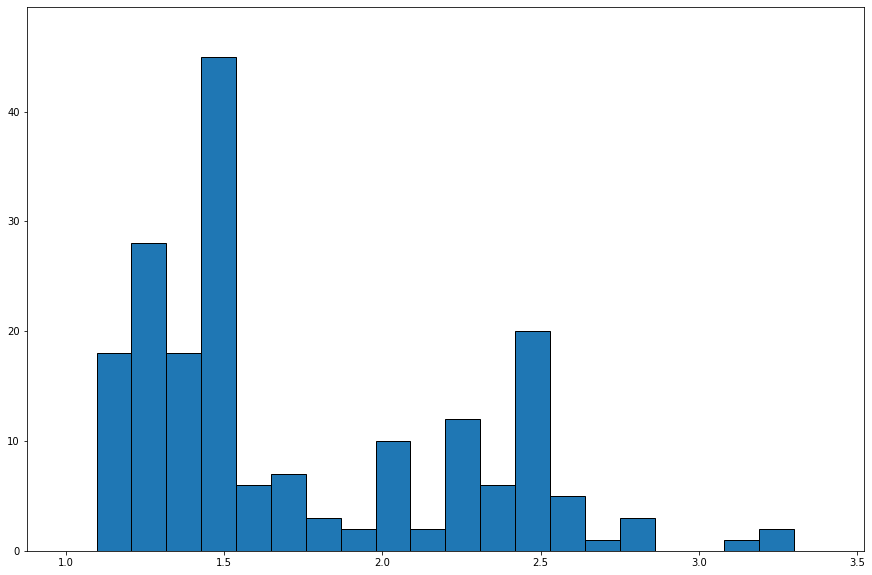

In [142]:
bins = 20
plt.figure(figsize=(15,10))
plt.hist(tmp_list,bins=bins,edgecolor='k')
plt.margins(0.1, 0.1)
plt.savefig('index_update/'+dir_name+'_idx.png',dpi=300)
plt.show()

# 3. trasmittance ----- [0-9.]+[±|–]*[0-9.]*%

In [171]:
def match_tran(nlp, sentence, values, candidates):
    doc = nlp(sentence)
    tmp = {}
    words_ = {} # ed - ori
    values_ = {} # ed - ori
    heads = {}
    for sent in doc.sentences:
        for word in sent.words:
            # print(word.text)
            for c in candidates:
                if word.text == c and word.text not in words_.keys():
                    words_[word.text] = c
            for v in values:
                if v[:-1] == word.text and word.text not in values_.keys():
                    values_[word.text] = v
    if len(words_.keys())!=len(candidates) or len(values_.keys())!=len(values):
        for sent in doc.sentences:
            for word in sent.words:
                # print(word.text)
                for c in candidates:
                    if (c.endswith(word.text) or word.text.endswith(c)) and word.text not in words_.keys():
                        words_[word.text] = c
                for v in values:
                    if v[:-1] in word.text and word.text not in values_.keys():
                            values_[word.text] = v
    for c in candidates.copy():
        if c not in words_.values():
            candidates.remove(c)
    for v in values.copy():
        if v not in values_.values():
            values.remove(v)
    # print(words_, values_)
    for sent in doc.sentences:
        for word in sent.words:
            if word.text in words_.keys():
                heads[words_[word.text]] = []
                head_id, head_text, head_word, head_re = return_head(sent, word)
                heads[words_[word.text]].append(head_id)
                if head_text in words_ or head_text == 'root':
                    continue
                if head_text in values_.keys():
                    tmp[values_[head_text]] = words_[word.text]
                count = 0
                while count < 10:
                    input_ = head_word
                    head_id, head_text, head_word, head_re = return_head(sent, input_)
                    if head_id not in heads[words_[word.text]]:
                        heads[words_[word.text]].append(head_id)
                    count += 1
            if word.text in values_.keys():
                heads[values_[word.text]] = []
                head_id, head_text, head_word, head_re = return_head(sent, word)
                heads[values_[word.text]].append(head_id)
                if head_text in values_.keys() or head_text == 'root':
                    continue
                if head_text in words_.keys():
                    tmp[values_[word.text]] = words_[head_text]
                count = 0
                while count < 10:
                    input_ = head_word
                    head_id, head_text, head_word, head_re = return_head(sent, input_)
                    if head_id not in heads[values_[word.text]]:
                        heads[values_[word.text]].append(head_id)
                    count += 1
    for v in values:
        for c in candidates:
            for vh in heads[v]:
                if vh in heads[c] and v not in tmp.keys():
                    tmp[v] = c           
                
    return tmp

In [194]:
import re

percen = {}
mat_percen = {}
reserve = reserve_material(dir_name)
for s in tqdm(sen_dict.keys()):
    if '%' in s and 'transmittance' in s:
        flag = 0
        if ' at ' in s:
            if 'nm' in s[s.index(' at '):]:
                flag = 1
        if 'maxim' in s or flag == 1:
            continue
        ori_s = s
        if '±' in s:
            s = s.replace(' ± ', '±')
            s = s.replace(' ±', '±')
            s = s.replace('± ', '±')
            s = s.replace('%±', '±')   
        re_t = s.index('transmittance')
        pos = judge('[0-9.]+[±|–]*[0-9.]*%', s[re_t:])
        percen_mat = {}
        candidates = []
        valid_p = []
        values_str = []
        for mat in sen_dict[ori_s]['materials'].keys():
            material = return_m(full_abb, mat)
            if material in reserve and mat not in candidates:
                candidates.append(mat)
        candidates = clean_candidates(s, candidates)
        for p in pos:
            degree = str2float(s[re_t:][p.span()[0]:p.span()[1]], '%')
            if degree and degree>90:
                valid_p.append(p)
                values_str.append(s[re_t:][p.span()[0]:p.span()[1]])
        if len(values_str)>0:
            if len(candidates)==1:
                if len(valid_p)>1:
                    percen_mat = is_appendix(s, candidates, values_str)
                    if percen_mat == {}:
                        dis_list = {}
                        for i, p in enumerate(valid_p):
                            dis_list[values_str[i]] = {}
                            dis_list[values_str[i]]['dis'] = abs(s.find(candidates[0])-(re_t+p.start()))
                            dis_list[values_str[i]]['pos'] = re_i+p.start()
                        sorted_dis = sorted(dis_list.items(), key=lambda item:item[1]['dis'])                   
                        percen_mat[sorted_dis[0][0]] = candidates[0]                    
                        for sd in sorted_dis[1:]:
                            if abs(sd[1]['pos']-sorted_dis[0][1]['pos'])<20:
                                percen_mat[sd[0]] = candidates[0]
                    # print(s)
                    # print(candidates, values_str)
                    # print(percen_mat)
                else:
                    percen_mat[values_str[0]] = candidates[0]
            elif len(candidates)>1:
                percen_mat = is_appendix(s, candidates, values_str)
                if percen_mat == {}:
                    percen_mat = is_split(s, candidates, values_str)
                    if percen_mat == {}:
                        percen_mat = match_tran(nlp, s, values_str, candidates)
        for p in percen_mat.keys():
            mat = return_m(full_abb,percen_mat[p])
            p_value = str2float(p, '%')
            if p_value not in percen.keys():
                percen[p_value] = 1
            else:
                percen[p_value] += 1
            mat_percen = update_dic(mat_percen, mat, p_value, ori_s, sen_dict)

100%|██████████| 163769/163769 [00:05<00:00, 32500.13it/s]


In [195]:
from matplotlib import pyplot as plt
import numpy as np

new_tr, new_mat_percen, tr_list = filter_(90, 100, [], percen, mat_percen)
print(len(tr_list))
json_str = json.dumps(new_mat_percen, indent=4)
with open('transmittance_update/'+dir_name+'_tr.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)
# print(new_tr)
# print(new_mat_percen)

102


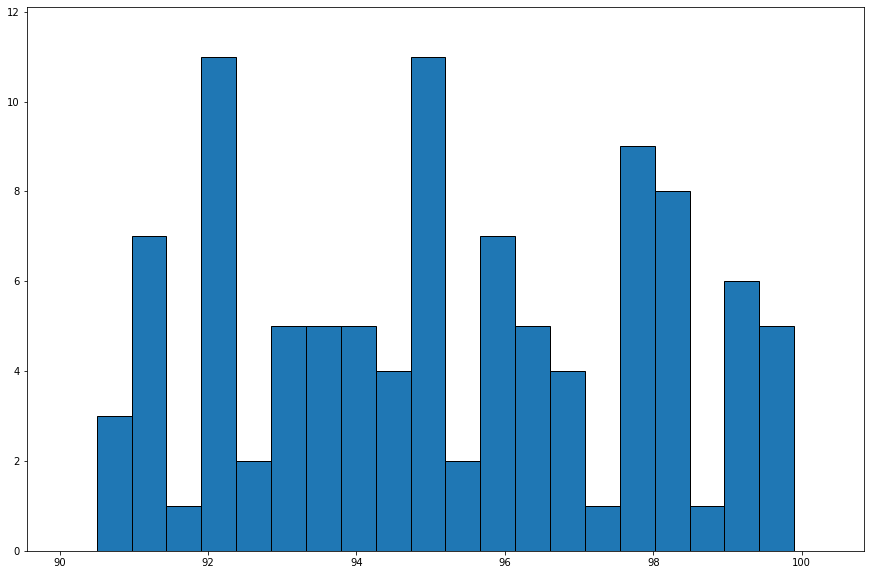

In [196]:
bins = 20
plt.figure(figsize=(15,10))
plt.hist(tr_list,bins=bins,edgecolor='k')
plt.margins(0.1, 0.1)
plt.savefig('transmittance_update/'+dir_name+'_tr.png',dpi=300)
plt.show()

# 2. contact angle / sliding angle ----- [0-9.]+[±]*[0-9.]*°

In [17]:
def match_angle(sen, poss, candidates, values):
    if 'contact angle' in s:
        candidates = ['contact angle', 'sliding angle']
    elif 'WCA' in s:
        candidates = ['WCA', 'sliding angle']
    else:
        candidates = ['CA', 'sliding angle']
    values = []
    for p in poss:
        values.append(sen[p.span()[0]:p.span()[1]])
    sen_sp = sen.split(',')
    tmp = {}
    for sp in sen_sp:
        pair = only_pair(sp, candidates, values)
        if pair:
            tmp[pair[1]] = pair[0]
    if '°and' in sen:
        sen = sen.replace('°and', '° and')
    if ' and ' in sen: # and 可以分割开
        and_p = [substr.start() for substr in re.finditer(' and ', sen)]
        for ap in and_p:
            pair = only_pair(sen[:ap], candidates, values)
            if pair:
                tmp[pair[1]] = pair[0]
            pair = only_pair(sen[ap:], candidates, values)
            if pair:
                tmp[pair[1]] = pair[0]                        
        
    return tmp

In [50]:
def match_nlp(nlp, sentence, values, candidates):
    doc = nlp(sentence)
    tmp = {}
    words_ = {} # ed - ori
    values_ = {} # ed - ori
    heads = {}
    for sent in doc.sentences:
        for word in sent.words:
            # print(word.text)
            for c in candidates:
                if word.text == c and word.text not in words_.keys():
                    words_[word.text] = c
            for v in values:
                if v[:-1] == word.text and word.text not in values_.keys():
                    values_[word.text] = v
    if len(words_.keys())!=len(candidates) or len(values_.keys())!=len(values):
        for sent in doc.sentences:
            for word in sent.words:
                # print(word.text)
                for c in candidates:
                    if (c.endswith(word.text) or word.text.endswith(c)) and word.text not in words_.keys():
                        words_[word.text] = c
                for v in values:
                    if (v[:-1] in word.text or word.text in v) and word.text not in values_.keys():
                            values_[word.text] = v
    for c in candidates.copy():
        if c not in words_.values():
            candidates.remove(c)
    for v in values.copy():
        if v not in values_.values():
            values.remove(v)
    # print(words_, values_)
    for sent in doc.sentences:
        for word in sent.words:
            if word.text in words_.keys():
                heads[words_[word.text]] = []
                head_id, head_text, head_word, head_re = return_head(sent, word)
                heads[words_[word.text]].append(head_id)
                if head_text in words_ or head_text == 'root':
                    continue
                if head_text in values_.keys():
                    tmp[values_[head_text]] = words_[word.text]
                count = 0
                while count < 10:
                    input_ = head_word
                    head_id, head_text, head_word, head_re = return_head(sent, input_)
                    if head_id not in heads[words_[word.text]]:
                        heads[words_[word.text]].append(head_id)
                    count += 1
            if word.text in values_.keys():
                heads[values_[word.text]] = []
                head_id, head_text, head_word, head_re = return_head(sent, word)
                heads[values_[word.text]].append(head_id)
                if head_text in values_.keys() or head_text == 'root':
                    continue
                if head_text in words_.keys():
                    tmp[values_[word.text]] = words_[head_text]
                count = 0
                while count < 10:
                    input_ = head_word
                    head_id, head_text, head_word, head_re = return_head(sent, input_)
                    if head_id not in heads[values_[word.text]]:
                        heads[values_[word.text]].append(head_id)
                    count += 1
    for v in values:
        for c in candidates:
            for vh in heads[v]:
                if vh in heads[c] and v not in tmp.keys():
                    tmp[v] = c           
                
    return tmp

In [51]:
import re
import stanza

# sliding angle: 0-30 Self-cleaning 画两个图 一个是0-50度的 一个是120-180度的 区间3度
# contact angle: hydrophilic的0-90; sc和photocatalytic的0-180
reserve = reserve_material(dir_name)
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,depparse')
ca = {}
sa = {}
ca_mat_degree = {}
sa_mat_degree = {}
for s in tqdm(sen_dict.keys()):
    ori_s = s
    if 'hysteresis' in s:
        continue
    if ('sliding angle' in s or 'contact angle' in s) and '°' in s:
        s = s.replace('Â', '')
        s = s.replace(' °', '')
        if '±' in s:
            s = s.replace(' ± ', '±')
            s = s.replace(' ±', '±')
            s = s.replace('± ', '±')
            s = s.replace('°±', '±')   
        pos = judge('[0-9.]+[±]*[0-9.]*°', s)
        degree_mat = {}
        valid_pos = []
        candidates = []
        values = []
        values_str = []
        for mat in sen_dict[ori_s]['materials'].keys():
            material = return_m(full_abb, mat)
            if material in reserve and 'hexadecane' not in mat and mat != 'ethylene glycol' and 'oil' not in mat:
                candidates.append(mat)
        candidates = clean_candidates(s, candidates)
        for p in pos:
            degree = str2float(s[p.span()[0]:p.span()[1]], '°')
            if degree and s[p.span()[0]:p.span()[1]]+'C' not in s:
                values.append(degree)
                valid_pos.append(p)
                values_str.append(s[p.span()[0]:p.span()[1]])
        if 'sliding angle' in s and ('contact angle' in s or ' WCA ' in s or ' CA ' in s):
            if candidates and values:
                m_d = match_angle(s, valid_pos, candidates, values_str)
                if m_d:
                    ca_tmp = []
                    sa_tmp = []
                    for d in m_d.keys():
                        degree = str2float(d, '°') 
                        if m_d[d] == 'contact angle' or m_d[d]=='WCA' or m_d[d] == 'CA':
                            ca_tmp.append(degree)
                            if degree not in ca.keys():
                                ca[degree] = 1
                            else:
                                ca[degree] += 1
                            for c in candidates:
                                mat = return_m(full_abb, c)
                                ca_mat_degree = update_dic(ca_mat_degree, mat, degree, ori_s, sen_dict)
                        if m_d[d] == 'sliding angle':
                            sa_tmp.append(degree)
                            if degree not in sa.keys():
                                sa[degree] = 1
                            else:
                                sa[degree] +=1
                            for c in candidates:
                                mat = return_m(full_abb, c)
                                sa_mat_degree = update_dic(sa_mat_degree, mat, degree, ori_s, sen_dict)
        if 'sliding angle' in s or ('contact angle' in s or ' WCA ' in s or ' CA ' in s):
            if len(values)>0:
                if len(candidates)==1:
                    if len(valid_pos)>1:
                        dis_list = {}
                        for i, p in enumerate(valid_pos):
                            dis_list[values[i]] = {}
                            dis_list[values[i]]['dis'] = abs(s.find(candidates[0])-p.start())
                            dis_list[values[i]]['pos'] = p.start()
                        sorted_dis = sorted(dis_list.items(), key=lambda item:item[1]['dis'])
                        degree_mat[sorted_dis[0][0]] = candidates[0]                    
                        for sd in sorted_dis[1:]:
                            if abs(sd[1]['pos']-sorted_dis[0][1]['pos'])<20:
                                degree_mat[sd[0]] = candidates[0]
                    else:                    
                        mat = return_m(full_abb, candidates[0])
                        degree_mat[values[0]] = mat
                elif len(candidates)>1:
                    degree_mat = {}
                    if len(values) == 3:
                        degree_mat = value_3(s, candidates, valid_pos)
                    if degree_mat == {}:
                        degree_mat = is_appendix(s, candidates, values_str)
                        if degree_mat == {}:
                            degree_mat = is_for(s, candidates, values_str)
                            if degree_mat == {}:
                                degree_mat = is_split(s, candidates, values_str)
                                if degree_mat == {}:
                                    degree_mat = match_nlp(nlp, s, values_str, candidates)
            if degree_mat:
                for d in degree_mat.keys():
                    if type(d) != float:
                        degree = str2float(d, '°') 
                    else:
                        degree = d
                    if degree:
                        mat = return_m(full_abb, degree_mat[d])
                        if 'contact angle' in s or ' WCA ' in s or ' CA ' in s:
                            if degree not in ca.keys():
                                ca[degree] = 1
                            else:
                                ca[degree] +=1
                            ca_mat_degree = update_dic(ca_mat_degree, mat, degree, ori_s, sen_dict)
                        elif 'sliding angle' in s:
                            if degree not in sa.keys():
                                sa[degree] = 1
                            else:
                                sa[degree] +=1
                            sa_mat_degree = update_dic(sa_mat_degree, mat, degree, ori_s, sen_dict)                    

2023-08-10 19:57:53 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-08-10 19:57:54 WARNING: Can not find mwt: default from official model list. Ignoring it.
2023-08-10 19:57:54 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2023-08-10 19:57:54 INFO: Use device: gpu
2023-08-10 19:57:54 INFO: Loading: tokenize
2023-08-10 19:57:54 INFO: Loading: pos
2023-08-10 19:57:54 INFO: Loading: lemma
2023-08-10 19:57:55 INFO: Loading: depparse
2023-08-10 19:57:55 INFO: Done loading processors!
100%|██████████| 1350480/1350480 [00:08<00:00, 158432.28it/s]


In [52]:
# 画图要求：contact angle 50 90 150 去掉, 无特殊要求则sa0-30，ca0-180
# Hydrophilic画一个ca0-90度的图   
# Hydrophobic画一个ca90-180度的图     
# Oleophobic画一个ca90-180度的图  
# Omniphobic画一个ca90-180度的图
# Self-cleaning sa0-50度的 一个是ca120-180度的
# draw histogram
from matplotlib import pyplot as plt
import numpy as np

new_sa, new_sa_mat_degree, sa_list = filter_(0, 30, [], sa, sa_mat_degree)
new_ca, new_ca_mat_degree, ca_list = filter_(90, 180, [50, 90, 150], ca, ca_mat_degree)
print(len(sa_list))
print(len(ca_list))
json_str = json.dumps(new_sa_mat_degree, indent=4)
with open('angle_update/'+dir_name+'_sa.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)
json_str = json.dumps(new_ca_mat_degree, indent=4)
with open('angle_update/'+dir_name+'_ca.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)

25
245


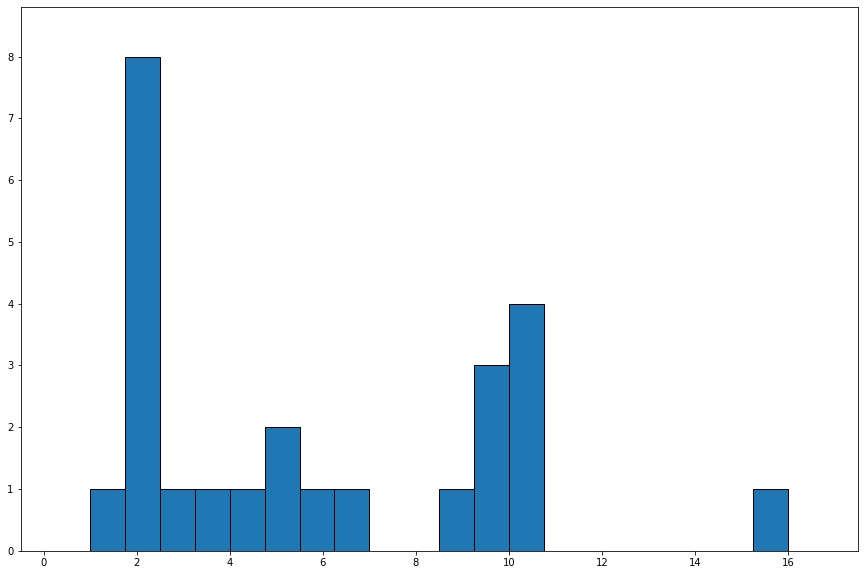

In [54]:
bins = 20
plt.figure(figsize=(15,10))
plt.hist(sa_list,bins=bins,edgecolor='k')
plt.margins(0.1, 0.1)
plt.savefig('angle_update/'+dir_name+'_sa.png',dpi=300)
plt.show()

# 1. Nano types recognition

In [54]:
import re

nano_types = ['nanoparticle', 'nanofiber', 'nanotube', 'nanorod', 'nanoplate', 'nanosheet', 'nanoribbon', 'nanocomposite', 'nanofoam', 
              'nanoporous', 'nanopores', 'nanocrystalline', 'nanocrystals', 'nanowires', 'nanotexture']
type_dict = {}
for s in tqdm(list(sen_dict.keys())):
    for n in nano_types:
        if n in s:
            pos = [substr.start() for substr in re.finditer(n, s)]
            for p in pos:
                min_dis = 100
                min_mat = ''
                for mat in sen_dict[s]['materials'].keys():
                    if abs(sen_dict[s]['materials'][mat][0]-p)<min_dis:
                        min_dis = abs(sen_dict[s]['materials'][mat][0]-p)
                        min_mat = mat
                # print(s, n, min_mat)
                if min_mat in full_abb.keys():
                    material = full_abb[min_mat]
                else:
                    material = min_mat
                if material not in type_dict.keys():
                    type_dict[material] = {}
                    type_dict[material][n] = 1
                else:
                    if n not in type_dict[material].keys():
                        type_dict[material][n] = 1
                    else:
                        type_dict[material][n] += 1
for t in type_dict.keys():
    if t in com_dict.keys():
        com_dict[t]['type'] = type_dict[t]
        
sorted_com = sorted(com_dict.items(), key=lambda item:item[1]['num'], reverse=True)
with open('material_names/'+dir_name+'/com_type_dict.txt', 'w', encoding='utf-8') as f:
    for i, sf in enumerate(sorted_com):
        if sf[1]['num'] > 1:
            if len(sf[1].keys())>1 and 'type' in sf[1].keys():
                f.write(str(i+1)+'\t'+sf[0]+'\t'+str(sf[1]['num'])+'\t'+str(sf[1]['type']))
                f.write('\n')

100%|██████████| 163769/163769 [00:00<00:00, 253449.56it/s]
